**In case of problems or questions, please first check the list of [Frequently Asked Questions (FAQ)](https://stardist.net/docs/faq.html).**

Please shutdown all other training/prediction notebooks before running this notebook (as those might occupy the GPU memory otherwise).

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import CellTracker.stardistwrapper as sdw

/tmp/ipykernel_20591/469011404.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Load Data

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.47it/s]


number of images:   2
- training:         1
- validation:       1
X[0].shape=(128, 168, 401)


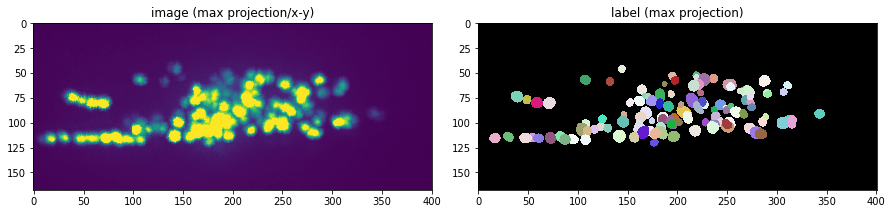

In [2]:
path_train_images = './stardist_02/data/train/images/*.tif'
path_train_labels = './stardist_02/data/train/labels/*.tif'
X, Y, X_trn, Y_trn, X_val, Y_val, n_channel = \
    sdw.load_training_images(path_train_images, path_train_labels, max_projection=True)

# Configuration

A `StarDist3D` model is specified via a `Config3D` object.

In [3]:
model = sdw.configure(Y, n_channel, model_name="stardist_02")

empirical anisotropy of labeled objects = (1.0, 1.0, 1.0)
div_by=(8, 8, 8)
n_dim: 3
axes: ZYXC
n_channel_in: 1
n_channel_out: 97
train_checkpoint: weights_best.h5
train_checkpoint_last: weights_last.h5
train_checkpoint_epoch: weights_now.h5
n_rays: 96
grid: (2, 2, 2)
anisotropy: (1.0, 1.0, 1.0)
backbone: unet
rays_json: {'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (1.0, 1.0, 1.0)}}
n_classes: None
unet_n_depth: 2
unet_kernel_size: (3, 3, 3)
unet_n_filter_base: 32
unet_n_conv_per_depth: 2
unet_pool: (2, 2, 2)
unet_activation: relu
unet_last_activation: relu
unet_batch_norm: False
unet_dropout: 0.0
unet_prefix: 
net_conv_after_unet: 128
net_input_shape: (None, None, None, 1)
net_mask_shape: (None, None, None, 1)
train_patch_size: [72, 72, 72]
train_background_reg: 0.0001
train_foreground_only: 0.9
train_sample_cache: True
train_dist_loss: mae
train_loss_weights: (1, 0.2)
train_class_weights: (1, 1)
train_epochs: 400
train_steps_per_epoch: 100
train_learning_rate: 0.000

base_model.py (149): output path for model already exists, files may be overwritten: /home/wen/PycharmProjects/3DeeCellTracker/Examples/models/stardist_02
2023-04-13 17:48:19.192272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 17:48:19.195860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 17:48:19.196304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-13 17:48:19.196887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the followin

Using default values: prob_thresh=0.5, nms_thresh=0.4.


2023-04-13 17:48:19.798542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-13 17:48:20.306767: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


median object size:      [10. 10. 10.]
network field of view :  [46 46 46]


# Data Augmentation

You can define a function/callable that applies augmentation to each batch of the data generator.  
We here use an `augmenter` that applies random rotations, flips, and intensity changes, which are typically sensible for (3D) microscopy images (but you can disable augmentation by setting `augmenter = None`).

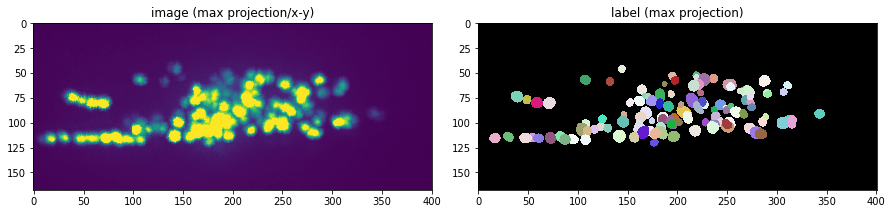

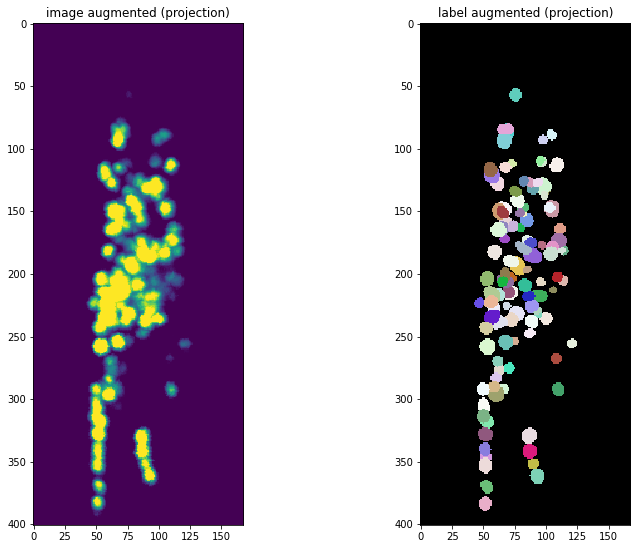

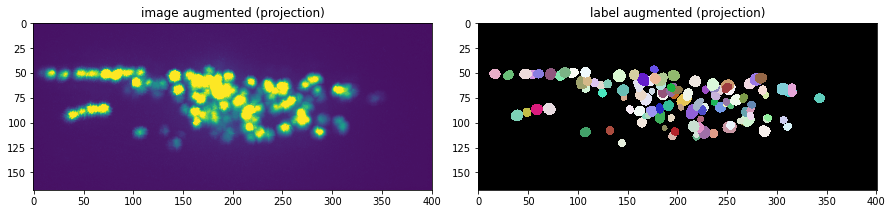

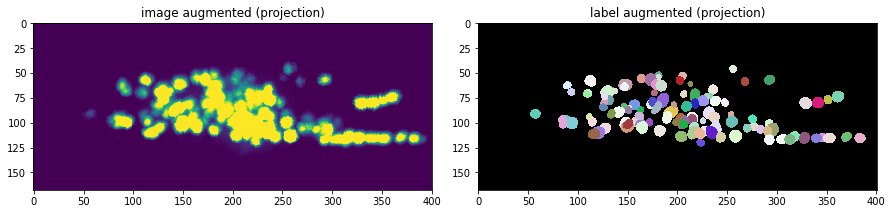

In [4]:
# plot some augmented examples
img, lbl = X[0],Y[0]
sdw.plot_img_label_max_projection(img, lbl)
for _ in range(3):
    img_aug, lbl_aug = sdw.augmenter(img,lbl)
    sdw.plot_img_label_max_projection(img_aug, lbl_aug, img_title="image augmented (projection)", lbl_title="label augmented (projection)")

# Training

We recommend to monitor the progress during training with [TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard). You can start it in the shell from the current working directory like this:

    $ tensorboard --logdir=.

Then connect to [http://localhost:6006/](http://localhost:6006/) with your browser.


In [5]:
model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=sdw.augmenter, epochs=500)

Epoch 1/500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7f3745c53430>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function _gcd_import at 0x7f3745c53430>. Note that functions defined in certain environments, like the i

Epoch 16/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2197 - prob_loss: 0.0188 - dist_loss: 1.0046 - prob_kld: 0.0045 - dist_relevant_mae: 1.0043 - dist_relevant_mse: 1.9745 - dist_dist_iou_metric: 0.6755 - val_loss: 0.1671 - val_prob_loss: 0.0039 - val_dist_loss: 0.8160 - val_prob_kld: 0.0012 - val_dist_relevant_mae: 0.8157 - val_dist_relevant_mse: 1.0640 - val_dist_dist_iou_metric: 0.7442
Epoch 17/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2235 - prob_loss: 0.0194 - dist_loss: 1.0208 - prob_kld: 0.0047 - dist_relevant_mae: 1.0205 - dist_relevant_mse: 2.0186 - dist_dist_iou_metric: 0.6741 - val_loss: 0.1797 - val_prob_loss: 0.0033 - val_dist_loss: 0.8819 - val_prob_kld: 5.8828e-04 - val_dist_relevant_mae: 0.8816 - val_dist_relevant_mse: 1.2593 - val_dist_dist_iou_metric: 0.7333
Epoch 18/500
100/100 [==============================] - 7s 65ms/step - loss: 0.2231 - prob_loss: 0.0196 - dist_loss: 1.0179 - prob_kld: 0.0044 - dist_relevant

100/100 [==============================] - 7s 65ms/step - loss: 0.1858 - prob_loss: 0.0206 - dist_loss: 0.8260 - prob_kld: 0.0037 - dist_relevant_mae: 0.8257 - dist_relevant_mse: 1.4203 - dist_dist_iou_metric: 0.7270 - val_loss: 0.1350 - val_prob_loss: 0.0032 - val_dist_loss: 0.6588 - val_prob_kld: 5.2295e-04 - val_dist_relevant_mae: 0.6585 - val_dist_relevant_mse: 0.7575 - val_dist_dist_iou_metric: 0.7805
Epoch 36/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1922 - prob_loss: 0.0182 - dist_loss: 0.8698 - prob_kld: 0.0035 - dist_relevant_mae: 0.8695 - dist_relevant_mse: 1.5478 - dist_dist_iou_metric: 0.7157 - val_loss: 0.1312 - val_prob_loss: 0.0033 - val_dist_loss: 0.6396 - val_prob_kld: 5.8598e-04 - val_dist_relevant_mae: 0.6392 - val_dist_relevant_mse: 0.7217 - val_dist_dist_iou_metric: 0.7861
Epoch 37/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1866 - prob_loss: 0.0195 - dist_loss: 0.8358 - prob_kld: 0.0036 - dist_relevant_mae: 0.8

100/100 [==============================] - 7s 65ms/step - loss: 0.1708 - prob_loss: 0.0206 - dist_loss: 0.7513 - prob_kld: 0.0033 - dist_relevant_mae: 0.7510 - dist_relevant_mse: 1.1865 - dist_dist_iou_metric: 0.7495 - val_loss: 0.1256 - val_prob_loss: 0.0031 - val_dist_loss: 0.6121 - val_prob_kld: 4.5207e-04 - val_dist_relevant_mae: 0.6118 - val_dist_relevant_mse: 0.6452 - val_dist_dist_iou_metric: 0.7922
Epoch 55/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1627 - prob_loss: 0.0173 - dist_loss: 0.7270 - prob_kld: 0.0028 - dist_relevant_mae: 0.7267 - dist_relevant_mse: 1.1091 - dist_dist_iou_metric: 0.7546 - val_loss: 0.1244 - val_prob_loss: 0.0031 - val_dist_loss: 0.6067 - val_prob_kld: 3.8332e-04 - val_dist_relevant_mae: 0.6064 - val_dist_relevant_mse: 0.6418 - val_dist_dist_iou_metric: 0.7884
Epoch 56/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1640 - prob_loss: 0.0180 - dist_loss: 0.7300 - prob_kld: 0.0029 - dist_relevant_mae: 0.7

100/100 [==============================] - 6s 65ms/step - loss: 0.1515 - prob_loss: 0.0172 - dist_loss: 0.6711 - prob_kld: 0.0025 - dist_relevant_mae: 0.6709 - dist_relevant_mse: 0.9511 - dist_dist_iou_metric: 0.7706 - val_loss: 0.1052 - val_prob_loss: 0.0030 - val_dist_loss: 0.5109 - val_prob_kld: 3.3092e-04 - val_dist_relevant_mae: 0.5106 - val_dist_relevant_mse: 0.4487 - val_dist_dist_iou_metric: 0.8288
Epoch 74/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1497 - prob_loss: 0.0176 - dist_loss: 0.6603 - prob_kld: 0.0025 - dist_relevant_mae: 0.6601 - dist_relevant_mse: 0.9294 - dist_dist_iou_metric: 0.7752 - val_loss: 0.1065 - val_prob_loss: 0.0030 - val_dist_loss: 0.5175 - val_prob_kld: 3.3559e-04 - val_dist_relevant_mae: 0.5173 - val_dist_relevant_mse: 0.4680 - val_dist_dist_iou_metric: 0.8229
Epoch 75/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1486 - prob_loss: 0.0192 - dist_loss: 0.6470 - prob_kld: 0.0025 - dist_relevant_mae: 0.6

100/100 [==============================] - 6s 65ms/step - loss: 0.1366 - prob_loss: 0.0165 - dist_loss: 0.6004 - prob_kld: 0.0021 - dist_relevant_mae: 0.6002 - dist_relevant_mse: 0.7781 - dist_dist_iou_metric: 0.7924 - val_loss: 0.0981 - val_prob_loss: 0.0030 - val_dist_loss: 0.4757 - val_prob_kld: 3.0734e-04 - val_dist_relevant_mae: 0.4754 - val_dist_relevant_mse: 0.3971 - val_dist_dist_iou_metric: 0.8382
Epoch 93/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1381 - prob_loss: 0.0176 - dist_loss: 0.6025 - prob_kld: 0.0022 - dist_relevant_mae: 0.6022 - dist_relevant_mse: 0.7766 - dist_dist_iou_metric: 0.7909 - val_loss: 0.0940 - val_prob_loss: 0.0030 - val_dist_loss: 0.4549 - val_prob_kld: 3.0436e-04 - val_dist_relevant_mae: 0.4546 - val_dist_relevant_mse: 0.3586 - val_dist_dist_iou_metric: 0.8436
Epoch 94/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1390 - prob_loss: 0.0167 - dist_loss: 0.6115 - prob_kld: 0.0020 - dist_relevant_mae: 0.6

100/100 [==============================] - 6s 65ms/step - loss: 0.1307 - prob_loss: 0.0177 - dist_loss: 0.5650 - prob_kld: 0.0020 - dist_relevant_mae: 0.5648 - dist_relevant_mse: 0.6748 - dist_dist_iou_metric: 0.8036 - val_loss: 0.0990 - val_prob_loss: 0.0030 - val_dist_loss: 0.4800 - val_prob_kld: 3.1837e-04 - val_dist_relevant_mae: 0.4798 - val_dist_relevant_mse: 0.3965 - val_dist_dist_iou_metric: 0.8327
Epoch 112/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1291 - prob_loss: 0.0171 - dist_loss: 0.5600 - prob_kld: 0.0020 - dist_relevant_mae: 0.5598 - dist_relevant_mse: 0.6580 - dist_dist_iou_metric: 0.8040 - val_loss: 0.0932 - val_prob_loss: 0.0030 - val_dist_loss: 0.4515 - val_prob_kld: 2.5994e-04 - val_dist_relevant_mae: 0.4512 - val_dist_relevant_mse: 0.3585 - val_dist_dist_iou_metric: 0.8440
Epoch 113/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1325 - prob_loss: 0.0181 - dist_loss: 0.5721 - prob_kld: 0.0020 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1257 - prob_loss: 0.0176 - dist_loss: 0.5407 - prob_kld: 0.0018 - dist_relevant_mae: 0.5404 - dist_relevant_mse: 0.6240 - dist_dist_iou_metric: 0.8129 - val_loss: 0.0946 - val_prob_loss: 0.0030 - val_dist_loss: 0.4579 - val_prob_kld: 3.4663e-04 - val_dist_relevant_mae: 0.4576 - val_dist_relevant_mse: 0.3618 - val_dist_dist_iou_metric: 0.8447
Epoch 131/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1252 - prob_loss: 0.0168 - dist_loss: 0.5423 - prob_kld: 0.0018 - dist_relevant_mae: 0.5421 - dist_relevant_mse: 0.6298 - dist_dist_iou_metric: 0.8096 - val_loss: 0.0951 - val_prob_loss: 0.0029 - val_dist_loss: 0.4611 - val_prob_kld: 2.2468e-04 - val_dist_relevant_mae: 0.4609 - val_dist_relevant_mse: 0.3674 - val_dist_dist_iou_metric: 0.8476
Epoch 132/500
100/100 [==============================] - 7s 65ms/step - loss: 0.1251 - prob_loss: 0.0170 - dist_loss: 0.5407 - prob_kld: 0.0017 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1238 - prob_loss: 0.0164 - dist_loss: 0.5369 - prob_kld: 0.0017 - dist_relevant_mae: 0.5366 - dist_relevant_mse: 0.5969 - dist_dist_iou_metric: 0.8124 - val_loss: 0.1005 - val_prob_loss: 0.0029 - val_dist_loss: 0.4880 - val_prob_kld: 2.5227e-04 - val_dist_relevant_mae: 0.4878 - val_dist_relevant_mse: 0.4083 - val_dist_dist_iou_metric: 0.8280
Epoch 150/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1206 - prob_loss: 0.0155 - dist_loss: 0.5252 - prob_kld: 0.0016 - dist_relevant_mae: 0.5250 - dist_relevant_mse: 0.5793 - dist_dist_iou_metric: 0.8179 - val_loss: 0.0864 - val_prob_loss: 0.0029 - val_dist_loss: 0.4173 - val_prob_kld: 2.3382e-04 - val_dist_relevant_mae: 0.4171 - val_dist_relevant_mse: 0.3076 - val_dist_dist_iou_metric: 0.8589
Epoch 151/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1190 - prob_loss: 0.0158 - dist_loss: 0.5161 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 7s 65ms/step - loss: 0.1183 - prob_loss: 0.0185 - dist_loss: 0.4992 - prob_kld: 0.0017 - dist_relevant_mae: 0.4990 - dist_relevant_mse: 0.5187 - dist_dist_iou_metric: 0.8258 - val_loss: 0.0880 - val_prob_loss: 0.0029 - val_dist_loss: 0.4256 - val_prob_kld: 2.2928e-04 - val_dist_relevant_mae: 0.4254 - val_dist_relevant_mse: 0.3185 - val_dist_dist_iou_metric: 0.8523
Epoch 169/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1166 - prob_loss: 0.0166 - dist_loss: 0.4999 - prob_kld: 0.0016 - dist_relevant_mae: 0.4997 - dist_relevant_mse: 0.5171 - dist_dist_iou_metric: 0.8253 - val_loss: 0.0859 - val_prob_loss: 0.0029 - val_dist_loss: 0.4150 - val_prob_kld: 2.3631e-04 - val_dist_relevant_mae: 0.4147 - val_dist_relevant_mse: 0.3031 - val_dist_dist_iou_metric: 0.8621
Epoch 170/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1166 - prob_loss: 0.0160 - dist_loss: 0.5031 - prob_kld: 0.0016 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1137 - prob_loss: 0.0168 - dist_loss: 0.4846 - prob_kld: 0.0015 - dist_relevant_mae: 0.4844 - dist_relevant_mse: 0.4921 - dist_dist_iou_metric: 0.8291 - val_loss: 0.0833 - val_prob_loss: 0.0029 - val_dist_loss: 0.4019 - val_prob_kld: 2.1403e-04 - val_dist_relevant_mae: 0.4017 - val_dist_relevant_mse: 0.2825 - val_dist_dist_iou_metric: 0.8653
Epoch 188/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1141 - prob_loss: 0.0164 - dist_loss: 0.4887 - prob_kld: 0.0015 - dist_relevant_mae: 0.4885 - dist_relevant_mse: 0.4947 - dist_dist_iou_metric: 0.8274 - val_loss: 0.0883 - val_prob_loss: 0.0029 - val_dist_loss: 0.4272 - val_prob_kld: 2.0662e-04 - val_dist_relevant_mae: 0.4270 - val_dist_relevant_mse: 0.3207 - val_dist_dist_iou_metric: 0.8510
Epoch 189/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1145 - prob_loss: 0.0168 - dist_loss: 0.4884 - prob_kld: 0.0015 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1132 - prob_loss: 0.0161 - dist_loss: 0.4856 - prob_kld: 0.0014 - dist_relevant_mae: 0.4855 - dist_relevant_mse: 0.4872 - dist_dist_iou_metric: 0.8311 - val_loss: 0.0866 - val_prob_loss: 0.0030 - val_dist_loss: 0.4181 - val_prob_kld: 3.0957e-04 - val_dist_relevant_mae: 0.4179 - val_dist_relevant_mse: 0.3099 - val_dist_dist_iou_metric: 0.8608
Epoch 207/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1118 - prob_loss: 0.0166 - dist_loss: 0.4757 - prob_kld: 0.0014 - dist_relevant_mae: 0.4756 - dist_relevant_mse: 0.4722 - dist_dist_iou_metric: 0.8322 - val_loss: 0.0813 - val_prob_loss: 0.0029 - val_dist_loss: 0.3918 - val_prob_kld: 2.5142e-04 - val_dist_relevant_mae: 0.3916 - val_dist_relevant_mse: 0.2707 - val_dist_dist_iou_metric: 0.8679
Epoch 208/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1108 - prob_loss: 0.0157 - dist_loss: 0.4753 - prob_kld: 0.0013 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1084 - prob_loss: 0.0150 - dist_loss: 0.4672 - prob_kld: 0.0013 - dist_relevant_mae: 0.4670 - dist_relevant_mse: 0.4538 - dist_dist_iou_metric: 0.8349 - val_loss: 0.0812 - val_prob_loss: 0.0029 - val_dist_loss: 0.3912 - val_prob_kld: 2.2805e-04 - val_dist_relevant_mae: 0.3910 - val_dist_relevant_mse: 0.2716 - val_dist_dist_iou_metric: 0.8674
Epoch 226/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1084 - prob_loss: 0.0155 - dist_loss: 0.4644 - prob_kld: 0.0013 - dist_relevant_mae: 0.4642 - dist_relevant_mse: 0.4496 - dist_dist_iou_metric: 0.8362 - val_loss: 0.0834 - val_prob_loss: 0.0029 - val_dist_loss: 0.4024 - val_prob_kld: 2.5397e-04 - val_dist_relevant_mae: 0.4023 - val_dist_relevant_mse: 0.2835 - val_dist_dist_iou_metric: 0.8609
Epoch 227/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1073 - prob_loss: 0.0147 - dist_loss: 0.4631 - prob_kld: 0.0012 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1097 - prob_loss: 0.0171 - dist_loss: 0.4634 - prob_kld: 0.0014 - dist_relevant_mae: 0.4633 - dist_relevant_mse: 0.4433 - dist_dist_iou_metric: 0.8383 - val_loss: 0.0783 - val_prob_loss: 0.0029 - val_dist_loss: 0.3768 - val_prob_kld: 2.3897e-04 - val_dist_relevant_mae: 0.3767 - val_dist_relevant_mse: 0.2505 - val_dist_dist_iou_metric: 0.8719
Epoch 245/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1098 - prob_loss: 0.0183 - dist_loss: 0.4576 - prob_kld: 0.0014 - dist_relevant_mae: 0.4575 - dist_relevant_mse: 0.4360 - dist_dist_iou_metric: 0.8385 - val_loss: 0.0901 - val_prob_loss: 0.0030 - val_dist_loss: 0.4354 - val_prob_kld: 2.9257e-04 - val_dist_relevant_mae: 0.4352 - val_dist_relevant_mse: 0.3391 - val_dist_dist_iou_metric: 0.8529
Epoch 246/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1090 - prob_loss: 0.0178 - dist_loss: 0.4558 - prob_kld: 0.0014 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1055 - prob_loss: 0.0160 - dist_loss: 0.4473 - prob_kld: 0.0012 - dist_relevant_mae: 0.4471 - dist_relevant_mse: 0.4129 - dist_dist_iou_metric: 0.8424 - val_loss: 0.0778 - val_prob_loss: 0.0029 - val_dist_loss: 0.3746 - val_prob_kld: 1.9109e-04 - val_dist_relevant_mae: 0.3744 - val_dist_relevant_mse: 0.2458 - val_dist_dist_iou_metric: 0.8750
Epoch 264/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1056 - prob_loss: 0.0162 - dist_loss: 0.4469 - prob_kld: 0.0012 - dist_relevant_mae: 0.4468 - dist_relevant_mse: 0.4160 - dist_dist_iou_metric: 0.8419 - val_loss: 0.0795 - val_prob_loss: 0.0029 - val_dist_loss: 0.3828 - val_prob_kld: 2.2846e-04 - val_dist_relevant_mae: 0.3827 - val_dist_relevant_mse: 0.2585 - val_dist_dist_iou_metric: 0.8690
Epoch 265/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1066 - prob_loss: 0.0168 - dist_loss: 0.4490 - prob_kld: 0.0013 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1052 - prob_loss: 0.0169 - dist_loss: 0.4415 - prob_kld: 0.0012 - dist_relevant_mae: 0.4413 - dist_relevant_mse: 0.4000 - dist_dist_iou_metric: 0.8450 - val_loss: 0.0760 - val_prob_loss: 0.0029 - val_dist_loss: 0.3658 - val_prob_kld: 1.6333e-04 - val_dist_relevant_mae: 0.3656 - val_dist_relevant_mse: 0.2366 - val_dist_dist_iou_metric: 0.8741
Epoch 283/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1059 - prob_loss: 0.0177 - dist_loss: 0.4410 - prob_kld: 0.0013 - dist_relevant_mae: 0.4409 - dist_relevant_mse: 0.4047 - dist_dist_iou_metric: 0.8446 - val_loss: 0.0744 - val_prob_loss: 0.0029 - val_dist_loss: 0.3577 - val_prob_kld: 1.5991e-04 - val_dist_relevant_mae: 0.3575 - val_dist_relevant_mse: 0.2245 - val_dist_dist_iou_metric: 0.8791
Epoch 284/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1054 - prob_loss: 0.0167 - dist_loss: 0.4434 - prob_kld: 0.0012 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1038 - prob_loss: 0.0163 - dist_loss: 0.4376 - prob_kld: 0.0012 - dist_relevant_mae: 0.4374 - dist_relevant_mse: 0.3900 - dist_dist_iou_metric: 0.8448 - val_loss: 0.0772 - val_prob_loss: 0.0029 - val_dist_loss: 0.3716 - val_prob_kld: 1.6388e-04 - val_dist_relevant_mae: 0.3714 - val_dist_relevant_mse: 0.2438 - val_dist_dist_iou_metric: 0.8747
Epoch 302/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1049 - prob_loss: 0.0176 - dist_loss: 0.4363 - prob_kld: 0.0013 - dist_relevant_mae: 0.4362 - dist_relevant_mse: 0.3927 - dist_dist_iou_metric: 0.8460 - val_loss: 0.0818 - val_prob_loss: 0.0028 - val_dist_loss: 0.3949 - val_prob_kld: 1.4246e-04 - val_dist_relevant_mae: 0.3947 - val_dist_relevant_mse: 0.2709 - val_dist_dist_iou_metric: 0.8621
Epoch 303/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1042 - prob_loss: 0.0168 - dist_loss: 0.4369 - prob_kld: 0.0012 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.1022 - prob_loss: 0.0148 - dist_loss: 0.4370 - prob_kld: 0.0011 - dist_relevant_mae: 0.4368 - dist_relevant_mse: 0.3922 - dist_dist_iou_metric: 0.8425 - val_loss: 0.0758 - val_prob_loss: 0.0029 - val_dist_loss: 0.3645 - val_prob_kld: 2.1237e-04 - val_dist_relevant_mae: 0.3643 - val_dist_relevant_mse: 0.2339 - val_dist_dist_iou_metric: 0.8778
Epoch 321/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1031 - prob_loss: 0.0158 - dist_loss: 0.4365 - prob_kld: 0.0012 - dist_relevant_mae: 0.4364 - dist_relevant_mse: 0.3896 - dist_dist_iou_metric: 0.8458 - val_loss: 0.0766 - val_prob_loss: 0.0029 - val_dist_loss: 0.3684 - val_prob_kld: 1.9989e-04 - val_dist_relevant_mae: 0.3682 - val_dist_relevant_mse: 0.2391 - val_dist_dist_iou_metric: 0.8761
Epoch 322/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1048 - prob_loss: 0.0158 - dist_loss: 0.4450 - prob_kld: 0.0012 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.0977 - prob_loss: 0.0144 - dist_loss: 0.4168 - prob_kld: 9.8648e-04 - dist_relevant_mae: 0.4167 - dist_relevant_mse: 0.3558 - dist_dist_iou_metric: 0.8512 - val_loss: 0.0738 - val_prob_loss: 0.0028 - val_dist_loss: 0.3549 - val_prob_kld: 1.4144e-04 - val_dist_relevant_mae: 0.3548 - val_dist_relevant_mse: 0.2230 - val_dist_dist_iou_metric: 0.8797
Epoch 340/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1005 - prob_loss: 0.0153 - dist_loss: 0.4257 - prob_kld: 0.0012 - dist_relevant_mae: 0.4255 - dist_relevant_mse: 0.3767 - dist_dist_iou_metric: 0.8475 - val_loss: 0.0742 - val_prob_loss: 0.0028 - val_dist_loss: 0.3571 - val_prob_kld: 1.3653e-04 - val_dist_relevant_mae: 0.3569 - val_dist_relevant_mse: 0.2254 - val_dist_dist_iou_metric: 0.8778
Epoch 341/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1013 - prob_loss: 0.0173 - dist_loss: 0.4200 - prob_kld: 0.0011 - dist_relevant_ma

100/100 [==============================] - 6s 65ms/step - loss: 0.0976 - prob_loss: 0.0143 - dist_loss: 0.4165 - prob_kld: 9.4146e-04 - dist_relevant_mae: 0.4164 - dist_relevant_mse: 0.3571 - dist_dist_iou_metric: 0.8514 - val_loss: 0.0735 - val_prob_loss: 0.0028 - val_dist_loss: 0.3536 - val_prob_kld: 1.3794e-04 - val_dist_relevant_mae: 0.3534 - val_dist_relevant_mse: 0.2203 - val_dist_dist_iou_metric: 0.8788
Epoch 359/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0999 - prob_loss: 0.0167 - dist_loss: 0.4161 - prob_kld: 0.0011 - dist_relevant_mae: 0.4160 - dist_relevant_mse: 0.3568 - dist_dist_iou_metric: 0.8531 - val_loss: 0.0727 - val_prob_loss: 0.0029 - val_dist_loss: 0.3491 - val_prob_kld: 1.8448e-04 - val_dist_relevant_mae: 0.3490 - val_dist_relevant_mse: 0.2161 - val_dist_dist_iou_metric: 0.8809
Epoch 360/500
100/100 [==============================] - 6s 65ms/step - loss: 0.1009 - prob_loss: 0.0177 - dist_loss: 0.4161 - prob_kld: 0.0011 - dist_relevant_ma

100/100 [==============================] - 6s 65ms/step - loss: 0.1030 - prob_loss: 0.0199 - dist_loss: 0.4155 - prob_kld: 0.0013 - dist_relevant_mae: 0.4154 - dist_relevant_mse: 0.3566 - dist_dist_iou_metric: 0.8544 - val_loss: 0.0723 - val_prob_loss: 0.0028 - val_dist_loss: 0.3473 - val_prob_kld: 1.3868e-04 - val_dist_relevant_mae: 0.3472 - val_dist_relevant_mse: 0.2129 - val_dist_dist_iou_metric: 0.8823
Epoch 378/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0985 - prob_loss: 0.0167 - dist_loss: 0.4092 - prob_kld: 0.0010 - dist_relevant_mae: 0.4091 - dist_relevant_mse: 0.3428 - dist_dist_iou_metric: 0.8542 - val_loss: 0.0738 - val_prob_loss: 0.0028 - val_dist_loss: 0.3551 - val_prob_kld: 1.3424e-04 - val_dist_relevant_mae: 0.3550 - val_dist_relevant_mse: 0.2256 - val_dist_dist_iou_metric: 0.8787
Epoch 379/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0983 - prob_loss: 0.0160 - dist_loss: 0.4113 - prob_kld: 0.0010 - dist_relevant_mae: 0

100/100 [==============================] - 6s 65ms/step - loss: 0.0984 - prob_loss: 0.0158 - dist_loss: 0.4126 - prob_kld: 9.8221e-04 - dist_relevant_mae: 0.4125 - dist_relevant_mse: 0.3529 - dist_dist_iou_metric: 0.8544 - val_loss: 0.0731 - val_prob_loss: 0.0028 - val_dist_loss: 0.3512 - val_prob_kld: 1.2981e-04 - val_dist_relevant_mae: 0.3511 - val_dist_relevant_mse: 0.2187 - val_dist_dist_iou_metric: 0.8813
Epoch 397/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0985 - prob_loss: 0.0163 - dist_loss: 0.4112 - prob_kld: 0.0010 - dist_relevant_mae: 0.4111 - dist_relevant_mse: 0.3471 - dist_dist_iou_metric: 0.8533 - val_loss: 0.0736 - val_prob_loss: 0.0029 - val_dist_loss: 0.3539 - val_prob_kld: 1.7001e-04 - val_dist_relevant_mae: 0.3538 - val_dist_relevant_mse: 0.2232 - val_dist_dist_iou_metric: 0.8789
Epoch 398/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0964 - prob_loss: 0.0147 - dist_loss: 0.4090 - prob_kld: 9.1245e-04 - dist_relevan

100/100 [==============================] - 6s 65ms/step - loss: 0.0944 - prob_loss: 0.0139 - dist_loss: 0.4024 - prob_kld: 8.5320e-04 - dist_relevant_mae: 0.4023 - dist_relevant_mse: 0.3301 - dist_dist_iou_metric: 0.8558 - val_loss: 0.0720 - val_prob_loss: 0.0028 - val_dist_loss: 0.3459 - val_prob_kld: 1.1772e-04 - val_dist_relevant_mae: 0.3458 - val_dist_relevant_mse: 0.2122 - val_dist_dist_iou_metric: 0.8815
Epoch 416/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0960 - prob_loss: 0.0158 - dist_loss: 0.4009 - prob_kld: 9.7216e-04 - dist_relevant_mae: 0.4008 - dist_relevant_mse: 0.3289 - dist_dist_iou_metric: 0.8570 - val_loss: 0.0722 - val_prob_loss: 0.0028 - val_dist_loss: 0.3469 - val_prob_kld: 1.2940e-04 - val_dist_relevant_mae: 0.3468 - val_dist_relevant_mse: 0.2131 - val_dist_dist_iou_metric: 0.8809
Epoch 417/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0967 - prob_loss: 0.0163 - dist_loss: 0.4022 - prob_kld: 9.6324e-04 - dist_rel

100/100 [==============================] - 6s 65ms/step - loss: 0.0965 - prob_loss: 0.0165 - dist_loss: 0.3998 - prob_kld: 9.9415e-04 - dist_relevant_mae: 0.3997 - dist_relevant_mse: 0.3268 - dist_dist_iou_metric: 0.8566 - val_loss: 0.0718 - val_prob_loss: 0.0028 - val_dist_loss: 0.3450 - val_prob_kld: 1.4887e-04 - val_dist_relevant_mae: 0.3449 - val_dist_relevant_mse: 0.2112 - val_dist_dist_iou_metric: 0.8830
Epoch 435/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0943 - prob_loss: 0.0146 - dist_loss: 0.3987 - prob_kld: 8.7026e-04 - dist_relevant_mae: 0.3986 - dist_relevant_mse: 0.3259 - dist_dist_iou_metric: 0.8564 - val_loss: 0.0718 - val_prob_loss: 0.0028 - val_dist_loss: 0.3450 - val_prob_kld: 1.3233e-04 - val_dist_relevant_mae: 0.3449 - val_dist_relevant_mse: 0.2110 - val_dist_dist_iou_metric: 0.8813
Epoch 436/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0955 - prob_loss: 0.0151 - dist_loss: 0.4017 - prob_kld: 9.2036e-04 - dist_rel

100/100 [==============================] - 6s 65ms/step - loss: 0.0963 - prob_loss: 0.0160 - dist_loss: 0.4017 - prob_kld: 9.2574e-04 - dist_relevant_mae: 0.4016 - dist_relevant_mse: 0.3314 - dist_dist_iou_metric: 0.8562 - val_loss: 0.0724 - val_prob_loss: 0.0028 - val_dist_loss: 0.3480 - val_prob_kld: 1.3199e-04 - val_dist_relevant_mae: 0.3479 - val_dist_relevant_mse: 0.2143 - val_dist_dist_iou_metric: 0.8815
Epoch 454/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0965 - prob_loss: 0.0160 - dist_loss: 0.4025 - prob_kld: 9.6144e-04 - dist_relevant_mae: 0.4024 - dist_relevant_mse: 0.3338 - dist_dist_iou_metric: 0.8564 - val_loss: 0.0715 - val_prob_loss: 0.0028 - val_dist_loss: 0.3433 - val_prob_kld: 1.2370e-04 - val_dist_relevant_mae: 0.3432 - val_dist_relevant_mse: 0.2095 - val_dist_dist_iou_metric: 0.8828
Epoch 455/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0957 - prob_loss: 0.0156 - dist_loss: 0.4006 - prob_kld: 9.1390e-04 - dist_rel

100/100 [==============================] - 6s 65ms/step - loss: 0.0960 - prob_loss: 0.0159 - dist_loss: 0.4007 - prob_kld: 9.6180e-04 - dist_relevant_mae: 0.4006 - dist_relevant_mse: 0.3330 - dist_dist_iou_metric: 0.8562 - val_loss: 0.0716 - val_prob_loss: 0.0028 - val_dist_loss: 0.3440 - val_prob_kld: 1.3021e-04 - val_dist_relevant_mae: 0.3439 - val_dist_relevant_mse: 0.2103 - val_dist_dist_iou_metric: 0.8822
Epoch 473/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0964 - prob_loss: 0.0165 - dist_loss: 0.3994 - prob_kld: 9.6202e-04 - dist_relevant_mae: 0.3993 - dist_relevant_mse: 0.3268 - dist_dist_iou_metric: 0.8579 - val_loss: 0.0716 - val_prob_loss: 0.0028 - val_dist_loss: 0.3440 - val_prob_kld: 1.4244e-04 - val_dist_relevant_mae: 0.3440 - val_dist_relevant_mse: 0.2105 - val_dist_dist_iou_metric: 0.8831
Epoch 474/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0957 - prob_loss: 0.0156 - dist_loss: 0.4005 - prob_kld: 8.8930e-04 - dist_rel

100/100 [==============================] - 6s 65ms/step - loss: 0.0961 - prob_loss: 0.0160 - dist_loss: 0.4002 - prob_kld: 9.3833e-04 - dist_relevant_mae: 0.4001 - dist_relevant_mse: 0.3282 - dist_dist_iou_metric: 0.8572 - val_loss: 0.0713 - val_prob_loss: 0.0028 - val_dist_loss: 0.3424 - val_prob_kld: 1.2519e-04 - val_dist_relevant_mae: 0.3424 - val_dist_relevant_mse: 0.2068 - val_dist_dist_iou_metric: 0.8829
Epoch 492/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0958 - prob_loss: 0.0157 - dist_loss: 0.4004 - prob_kld: 9.1417e-04 - dist_relevant_mae: 0.4004 - dist_relevant_mse: 0.3312 - dist_dist_iou_metric: 0.8556 - val_loss: 0.0714 - val_prob_loss: 0.0028 - val_dist_loss: 0.3429 - val_prob_kld: 1.4320e-04 - val_dist_relevant_mae: 0.3428 - val_dist_relevant_mse: 0.2096 - val_dist_dist_iou_metric: 0.8823
Epoch 493/500
100/100 [==============================] - 6s 65ms/step - loss: 0.0957 - prob_loss: 0.0159 - dist_loss: 0.3990 - prob_kld: 9.4489e-04 - dist_rel

# Threshold optimization

While the default values for the probability and non-maximum suppression thresholds already yield good results in many cases, we still recommend to adapt the thresholds to your data. The optimized threshold values are saved to disk and will be automatically loaded with the model.

In [6]:
model.optimize_thresholds(X_val, Y_val)

NMS threshold = 0.5:  75%|█████████████████████████████████████████████████████████████████████████████████                           | 15/20 [00:10<00:03,  1.38it/s, 0.548 -> 0.963]


Using optimized values: prob_thresh=0.545286, nms_thresh=0.3.
Saving to 'thresholds.json'.


{'prob': 0.5452864660955807, 'nms': 0.3}

# Evaluation and Detection Performance

Besides the losses and metrics during training, we can also quantitatively evaluate the actual detection/segmentation performance on the validation data by considering objects in the ground truth to be correctly matched if there are predicted objects with overlap (here [intersection over union (IoU)](https://en.wikipedia.org/wiki/Jaccard_index)) beyond a chosen IoU threshold $\tau$.

The corresponding matching statistics (average overlap, accuracy, recall, precision, etc.) are typically of greater practical relevance than the losses/metrics computed during training (but harder to formulate as a loss function). 
The value of $\tau$ can be between 0 (even slightly overlapping objects count as correctly predicted) and 1 (only pixel-perfectly overlapping objects count) and which $\tau$ to use depends on the needed segmentation precision/application.

Please see `help(matching)` for definitions of the abbreviations used in the evaluation below and see the Wikipedia page on [Sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) for further details.

In [ ]:
# help(matching)

First predict the labels for all validation images:

In [7]:
Y0_val_pred = model.predict_instances(X_val[0], n_tiles=model._guess_n_tiles(X_val[0]), show_tile_progress=False)[0]

Plot a GT/prediction example  

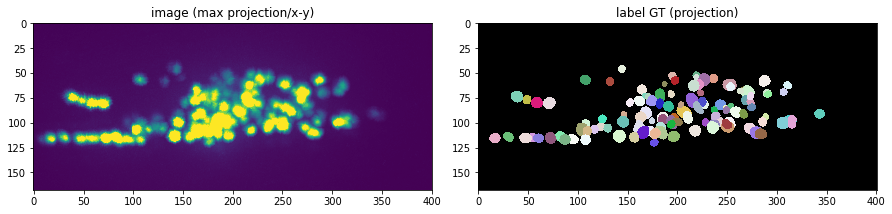

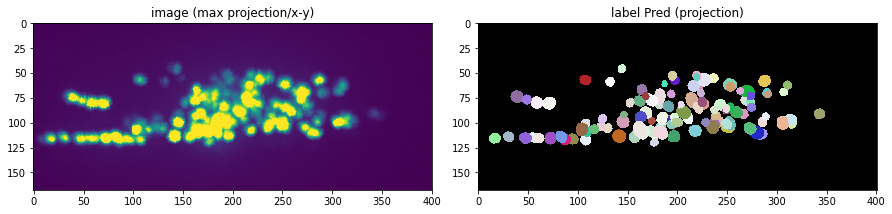

In [8]:
sdw.plot_img_label_max_projection(X_val[0],Y_val[0], lbl_title="label GT (projection)")
sdw.plot_img_label_max_projection(X_val[0],Y0_val_pred, lbl_title="label Pred (projection)")